<a href="https://colab.research.google.com/github/rahiakela/hands-on-unsupervised-learning-using-python/blob/main/3-dimensionality-reduction/1_motivation_for_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Motivation for Dimensionality Reduction

The major challenges in building successful applied machine learning solutions: **the curse of dimensionality**. Unsupervised learning has a great counter—**dimensionality reduction**.

Dimensionality reduction helps counteract one of the most commonly occurring problems in machine learning—the curse of dimensionality—in which algorithms cannot effectively and efficiently train on the data because of the sheer size of the feature space.

Dimensionality reduction algorithms project high-dimensional data to a lowdimensional space, retaining as much of the salient information as possible while removing redundant information. Once the data is in the low-dimensional space, machine learning algorithms are able to identify interesting patterns more effectively and efficiently because a lot of the noise has been reduced.

Sometimes, dimensionality reduction is the goal itself—for example, to build
anomaly detection systems.

Other times, dimensionality reduction is not an end in itself but rather a means to another end. 

For example, dimensionality reduction is commonly a part of the
machine learning pipeline to help solve large-scale, computationally expensive
problems involving images, video, speech, and text.


## Setup

In [7]:
'''Main'''
import numpy as np
import pandas as pd
import os, time, pickle, gzip
import datetime

'''Data Prep'''
from sklearn import preprocessing as pp 

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [ ]:
!wget https://github.com/aapatel09/handson-unsupervised-learning/raw/master/datasets/mnist_data/mnist.pkl.gz

## Data acquisition and exploration

We will work with a simple computer vision dataset: the MNIST (Mixed National Institute of Standards and Technology) database of handwritten digits, one of the best known datasets in machine learning.

This dataset consists of 28x28 pixel images of handwritten digits. Every single
data point (i.e., every image) can be conveyed as an array of numbers, where
each number describes how dark each pixel is. In other words, a 28x28 array of
numbers corresponds to a 28x28 pixel image.

To make this simpler, we can flatten each array into a 28x28, or 784,
dimensional vector. Each component of the vector is a float between zero and
one—representing the intensity of each pixel in the image. Zero stands for black;
one stands for white. The labels are numbers between zero and nine, and indicate
which digit the image represents.

Let’s now load the MNIST datasets:

In [21]:
# Load the datasets
f = gzip.open("mnist.pkl.gz", "rb")
train_set, validation_set, test_set = pickle.load(f, encoding="latin1")
f.close()

X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

Let’s verify the shape of the datasets to make sure they loaded properly:

In [23]:
# Verify shape of datasets
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_validation: ", X_validation.shape)
print("Shape of y_validation: ", y_validation.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50000, 784)
Shape of y_train:  (50000,)
Shape of X_validation:  (10000, 784)
Shape of y_validation:  (10000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


Let’s convert the numpy arrays into Pandas DataFrames so they are easier to
explore and work with:

In [24]:
# Create Pandas DataFrames from the datasets
train_index = range(0, len(X_train))
validation_index = range(len(X_train), len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation), len(X_train)+len(X_validation) + len(X_test))

X_train = pd.DataFrame(data=X_train, index=train_index)
y_train = pd.Series(data=y_train, index=train_index)

X_validation = pd.DataFrame(data=X_validation,index=validation_index)
y_validation = pd.Series(data=y_validation,index=validation_index)

X_test = pd.DataFrame(data=X_test , index=test_index)
y_test = pd.Series(data=y_test, index=test_index)

Let’s generate a summary view of the data:

In [25]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000010,0.000037,0.000017,7.031250e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.000004,0.000044,0.000108,0.000155,0.000210,0.000380,0.000570,...,0.013975,0.010081,0.006603,0.003967,0.002168,0.001039,0.000333,0.000067,2.343750e-07,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.000012,0.000067,0.000173,0.000377,0.000501,0.000709,0.001159,0.001440,0.001910,0.002044,0.002479,0.002171,0.001725,0.001215,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002034,0.005825,0.003773,1.572223e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000280,0.000833,0.004514,0.008921,0.010814,0.012095,0.016715,0.020658,...,0.102319,0.086386,0.070681,0.054545,0.041041,0.027224,0.014586,0.005078,5.240772e-05,0.001031,0.0,0.0,0.0,0.0,0.0,0.0,0.001872,0.007228,0.010340,0.016519,0.019057,0.023204,0.027897,0.032083,0.037493,0.037788,0.042872,0.039894,0.034695,0.029488,0.022778,0.015422,0.012079,0.007217,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [26]:
# Show the labels
y_train.head()

0    5
1    0
2    4
3    1
4    9
dtype: int64

Let’s define a function to view the image along with its label:

In [27]:
def view_digit(example):
  label = y_train.loc[example]
  image = X_train.loc[example,:].values.reshape([28,28])
  plt.title('Example: %d  Label: %d' % (example, label))
  plt.imshow(image, cmap=plt.get_cmap('gray'))
  plt.show()

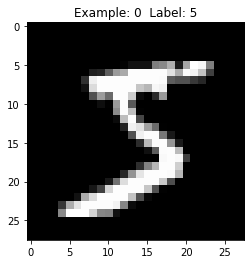

In [28]:
# View the first digit
view_digit(0)